In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import plotly.express as px
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/MyDrive/train_data.csv")
df.head()

<ipython-input-3-b592663529e2>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("drive/MyDrive/train_data.csv")


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


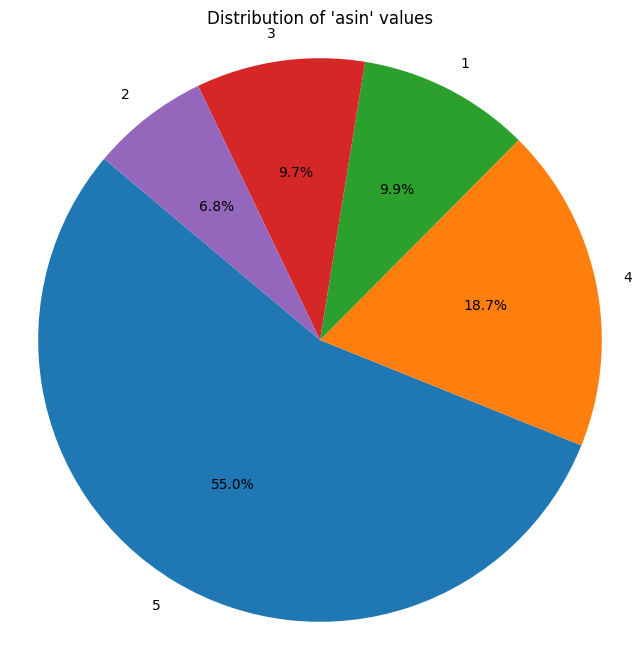

In [4]:
import matplotlib.pyplot as plt

label = df['overall'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label, labels=label.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of 'asin' values")
plt.axis('equal')
plt.show()


In [ ]:
df.isna().sum()

overall                0
vote              647476
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             348331
reviewerName         202
reviewText             0
summary               75
unixReviewTime         0
dtype: int64

In [ ]:
df['summary'] = df['summary'].fillna('')
df["full"] = df['summary']+" " + df['reviewText']
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,full
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,Cannot Learn I have an older URC-WR7 remote an...
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,zero programming needed! Miracle!? First time...
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,Works Good and programs easy. Got them and onl...
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,Same as TWC remote I got tired of the remote b...
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,Good Quality Cord After purchasing cheap cords...


# for test pouposes drop 5 overall rate

In [ ]:
MASK = df['overall']== 5
df = df[~MASK]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377459 entries, 0 to 838941
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         377459 non-null  int64 
 1   vote            91384 non-null   object
 2   verified        377459 non-null  bool  
 3   reviewTime      377459 non-null  object
 4   reviewerID      377459 non-null  object
 5   asin            377459 non-null  object
 6   style           217603 non-null  object
 7   reviewerName    377378 non-null  object
 8   reviewText      377459 non-null  object
 9   summary         377459 non-null  object
 10  unixReviewTime  377459 non-null  int64 
 11  full            377459 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 34.9+ MB


In [ ]:
import plotly.graph_objects as go

# Create a histogram for each sentiment class
fig = go.Figure()

for sentiment in range(1, 6):
    # Filter the data for a specific sentiment class
    sentiment_data = df['full'][df['overall'] == sentiment]

    # Split the text into words and calculate word counts
    word_counts = sentiment_data.apply(lambda x: len(x.split()))

    # Create a histogram trace
    fig.add_trace(go.Histogram(x=word_counts, name=f'Sentiment {sentiment}'))

# Customize the layout
fig.update_layout(
    title="Word Count Histogram for Different Sentiments",
    xaxis_title="Word Count",
    yaxis_title="Frequency",
    barmode="overlay",
)

# Show the plot
fig.show()


In [ ]:
gojo = "this is a nicely product"
print(' '.join(gojo.split()[:3]))

this is a


In [ ]:
import plotly.graph_objects as go

# Create a histogram for each sentiment class
fig = go.Figure()

for sentiment in range(1, 6):
    # Filter the data for a specific sentiment class
    sentiment_data = df['full'][df['overall'] == sentiment]

    # Truncate each entry to the first 1300 words
    truncated_data = sentiment_data.apply(lambda x: ' '.join(x.split()[:200]))

    # Calculate the word count for each entry
    word_counts = truncated_data.apply(lambda x: len(x.split()))

    # Create a histogram trace
    fig.add_trace(go.Histogram(x=word_counts, name=f'Sentiment {sentiment}'))

# Customize the layout
fig.update_layout(
    title="Word Count Histogram for Different Sentiments",
    xaxis_title="Word Count",
    yaxis_title="Frequency",
    barmode="overlay",
)

# Show the plot
fig.show()


In [ ]:
y = df['overall']
x = df['full']
del df
X_train , X_val , y_train , y_val = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
classification_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(classification_report)


Accuracy: 0.6341536095930007
              precision    recall  f1-score   support

           1       0.47      0.69      0.56     16509
           2       0.30      0.13      0.18     11239
           3       0.36      0.26      0.30     16367
           4       0.42      0.47      0.44     31244
           5       0.81      0.81      0.81     92430

    accuracy                           0.63    167789
   macro avg       0.47      0.47      0.46    167789
weighted avg       0.63      0.63      0.63    167789



In [ ]:
!pip install transformers
!pip install accelerate -U
!pip install transformers[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.5 MB/s eta 0:00:00


# small version

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load a pre-trained DistilBERT model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=4)  # Assuming 5 sentiment classes

# Tokenize your text data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True)



# # Use the model for inference
# test_encodings = tokenizer(list(X_test), truncation=True, padding=True)
# predictions = trainer.predict(test_encodings)

# Compute accuracy, F1-score, or other relevant metrics for evaluation


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImportError: ignored

In [ ]:
!pip install transformers[torch] -U
!pip install accelerate -U


In [ ]:
# Install the transformers library with torch support
!pip install transformers[torch]

# Upgrade the accelerate library
!pip install accelerate -U


In [ ]:
import torch
# Create a Trainer for fine-tuning
training_args = TrainingArguments(
    output_dir="./distilbert_sentiment_model",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    eval_steps=500,  # Adjust as needed
    num_train_epochs=3,  # Adjust as needed
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=val_encodings,
)

# Fine-tune the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

ImportError: ignored

# big version

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Load a pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5)

# Tokenize your text data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True)

# Create a Trainer for fine-tuning
training_args = TrainingArguments(
    output_dir="./bert_sentiment_model",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="steps",
    eval_steps=500,  # Adjust as needed
    num_train_epochs=3,  # Adjust as needed
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=val_encodings,
)

# Fine-tune the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# # Use the model for inference
# test_encodings = tokenizer(list(X_test), truncation=True, padding=True)
# predictions = trainer.predict(test_encodings)

# Compute accuracy, F1-score, or other relevant metrics for evaluation


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: ignored